# Phil McCormick, Brooke Johnson, Zuriel Sanders
MSDS 598 - Spring 2022

Final Assignment

Everyone worked equally on this assignment, we had no issues. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.formula.api import ols
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Question 1. Do the following to explore the data.
### (a) Print the number of missing values for each variable. Are there any variables that you think might have issues from this?

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/melb_data.csv')

df.isnull().sum()

FileNotFoundError: ignored

#### Answer:
Building Area, Year Built, and Council Area have a lot of missing values. The Year Built, and Building Area missing is an issue for the Price variable since a lot of a houses price is derived from the year a house was built, it's size and area.

### (b) Create a bar chart that shows the median housing price for each Regionname. Do you think that Regionname will affect housing price?

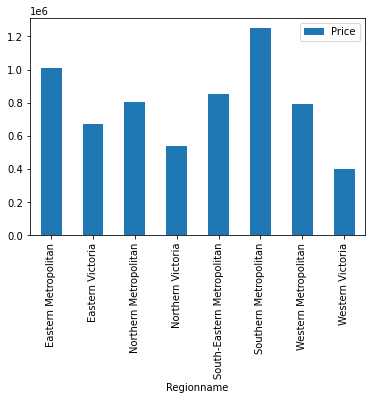

In [ ]:
order = ['Price']
df.groupby('Regionname')[order].median().plot.bar(stacked=True)

#### Answer:
It seems that houses located in the Southern Metropolitan have a noticeably higher average price than the rest of the regions. RegionName does seem to have an affect on housing price. 

While the naming convention itself likely isn't directly affecting home prices, it seems that names associated with specific regions having higher median prices than others, suggesting here is a non-uniform distribution of home prices between the regions.

### (c) Use seaborn’s lmplot function to create a scatter plot with Lattitude on the x-axis and Longtitude on the y-axis colored by Distance (Hint: set legend andfit reg to False). What is this?

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


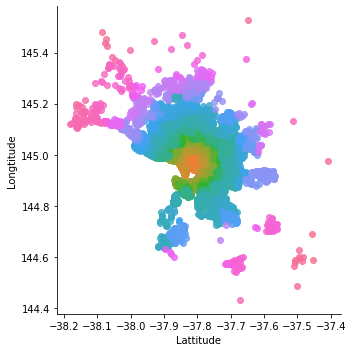

In [ ]:
sns.lmplot( x="Lattitude", y="Longtitude", data=df,legend=False, fit_reg=False, hue='Distance')
plt.show()

#### Answer:
This is a map showing the geo-spacial distribution of houses in the area, where plotted observations change color based on their distance to the center (approx. (-37.7, 144.9)).

## Question 2. Assume that the mean of Price in this dataset is the population mean for housing prices in Melbourne. Choose a particular Region, take a random sample of 25 houses from Regionname and conduct a z-test with level of significance α = 0.5 to decide if housing prices in this Region differ from the population mean significantly. Use the standard error of the sample as the variance for the distribution of sample means. 

### (a) What are the Null and Alternative Hypothesis?

# $𝐻_0:\beta_1 = 1075684$
# $𝐻_1:\beta_1 \not= 1075684$


In [ ]:
mean_price = df['Price'].mean()
mean_price

1075684.079455081

### (b) Use the p-value to decide whether to reject or fail to reject.

In [ ]:
import scipy.stats

df_sample = df[df['Regionname'] == 'Northern Metropolitan'].sample(frac=0.005)

sample_mean = df_sample['Price'].mean()
sample_mean

886210.5263157894

In [ ]:
std_error = scipy.stats.sem(df_sample['Price'], nan_policy='omit')
std_error

84872.50772154475

In [ ]:
z = (sample_mean - mean_price) / (std_error)
z

# df_mean is not defined, should it be mean_price? [BROOKE]

-2.2324490960126764

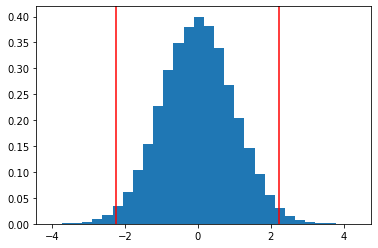

In [ ]:

def p_left_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)

ndst = np.random.normal(0, 1, 100000)
plt.hist(ndst, bins=30, density=True)


plt.axvline(x=-z, color='red')
plt.axvline(x=z, color='red')
plt.show()

Based on the chart the distribution is symmetric, so I'll find twice the area left of the left-most red line.

In [ ]:
p = 2*p_left_of_z(-z)
p

1.9744147039735642

#### Answer:
I calculated a p-value of 1.97, since 1.97 > 0.5 we'll fail to reject the null hypothesis. And will say that mean housing prices in Melborne are a good reflection of housing prices in the Northern Metropolitan area. 

## Question 3. Find two variables that are linearly correlated and provide the three pieces of evidence.

### (a) Scattor plot of the two variables

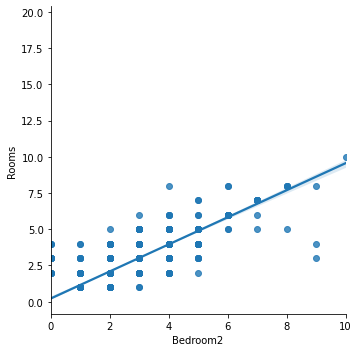

In [ ]:
sns.lmplot( x="Bedroom2", y="Rooms", data=df,legend=False)
plt.xlim(0, 10)
plt.show()

### (b) Pearson Correlation Coefficient between the two variables

In [ ]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


#### Answer:
The Pearson Correlation Coefficient between Bedroom2 and Rooms is 0.944. Which shows strong positive correlation.

### (c) Scatter plot of the fitted values of the line of best fit against the residuals


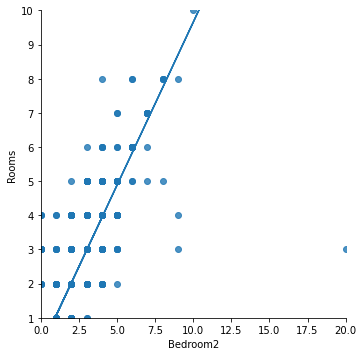

In [ ]:
# fit the model
model = ols(formula = 'Bedroom2 ~ Rooms', data=df)
res = model.fit()
b, m = res.params

x = df['Bedroom2']

# make the plot
sns.lmplot( x="Bedroom2", y="Rooms", data=df, fit_reg=False)


plt.plot(x, m*x + b)

plt.xlim(min(df["Bedroom2"]), max(df["Bedroom2"]))
plt.ylim(min(df["Rooms"]), max(df["Rooms"]))
plt.show()

## Question 4.

### (a) Pick three variables that might be linearly correlated with Price (anything with Correlation Coefficient ρ satisfying |ρ|> 0.1) that satisfy a *weak* assumption of non-Multicolinearity (use a Correlation Coefficient ρ satisfying |ρ|> 0.75 to determine **strongly** colinear)

In [ ]:
#looked for graphic relationships, reference w/ Corr Coef |p|>.1
sns.pairplot(data=df, y_vars="Price")

#### Answer:
I chose to use the variables "Bathroom", "Bedroom2", and "YearBuilt", with Pearson Correlation Coefficients of 0.47, 0.48, and -0.32, respectively (0.75 > |p| > 0.10).

### (b) Perform OLS regression and report the ${R^2}$.

In [ ]:
df = df.dropna()
model = ols(formula = 'Price ~ Bathroom + Bedroom2 + YearBuilt', data=df)
res2 = model.fit()
res2.summary()

In [ ]:
print(f'This model has an R^2 of {res2.rsquared}')

## Question 5.
### (a) Create a validation set using ten percent of the data.

In [ ]:
from sklearn.model_selection import train_test_split

# take random 10% of the sales for testing
train, val = train_test_split(df, test_size=0.1, random_state=2020)

### (b) Engineer one new feature.

In [ ]:
# new feature-ratio of Bedrooms to Bathrooms

train['Bedroom_to_Bathroom'] = train['Bedroom2'] / train['Bathroom'] 
val['Bedroom_to_Bathroom'] = val['Bedroom2'] / val['Bathroom'] 

In [ ]:
# Here is an adjustment made to this feature to convert the non-finite values to nan, drop them, then round all the results to 2 decimal places: [Brooke]

# train:
train[train==np.inf]=np.nan
trian = train.dropna()

train['Bedroom_to_Bathroom'].round(decimals = 2)

# val:
val[val==np.inf]=np.nan
val = val.dropna()

val['Bedroom_to_Bathroom'].round(decimals = 2)

### (c) Use this validation set and the ${R^2}$ metric to decide if this new feature improves the model.

In [ ]:
# build model on training set
model = ols(formula = 'Price ~ Bathroom + Bedroom2 + Bedroom_to_Bathroom + YearBuilt', data=train)
res = model.fit()

# predict using the model
y_pred = res.predict(val)

# score the model
y = val['Price']
y_mean = train['Price'].mean()  # use the mean of the training set

TSS = sum((y - y_mean)**2)
RSS = sum((y_pred - y)**2)
print(f'This model has an R^2 on the test set of {(TSS - RSS) / TSS}')

## Question 6

### (a) Create a new variable called above_median which indicates whether a house's price is above the median price for houses in this dataset.

In [ ]:
# adding new feature to the train and validation set: dummy variable for if a house is above the median home price

# training set:
train['above_median'] = train['Price'].apply(lambda x : int(x >= (train['Price'].median())))

# validation set:
val['above_median'] = val['Price'].apply(lambda x : int(x >= (val['Price'].median())))

### (b) Report the accuracy of your model from Q5 created from the training set at predicting this new variable on the validation set. 

In [ ]:
y_pred = res.predict(train)
y_pred = y_pred > train["Price"].median()

In [ ]:
correct = sum(y_pred == train['above_median'])
accuracy = correct / len(y_pred)
print(f'This model has accuracy: {100*accuracy}%')

#### (c) Perform Logistic regression using the same training set and report the accuracy from using this model on the same validation set. 

In [ ]:
from statsmodels.formula.api import logit

model2 = logit(formula = 'above_median ~ Bathroom + Bedroom2 + Bedroom_to_Bathroom + YearBuilt', data=train)
res2 = model2.fit()

x = val[['Bathroom', 'Bedroom2', 'Bedroom_to_Bathroom', ' YearBuilt']]
y = val['above_median']

In [ ]:
y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

In [ ]:
acc = metrics.accuracy_score(y, y_pred)
print(f'This model has accuracy: {100*accuracy}%')

#### (d) Compute the Precision, Recall, and AUC for both models on the validation set. 

In [ ]:
recall = metrics.recall_score(y, y_pred)
prec = metrics.precision_score(y, y_pred)

print(f'The Recall of the model on the validation set is {recall}')
print(f'The Precision of the model on the validation set is {prec}')

## Question 7
Perform a linear regression using the training set from Q5 with all numerical variables to predict price use either Lasso or Ridge regression. Report the ${R^2}$
 on the validation set. 

In [ ]:
# chose to use Ridge regression due to lower amount of variables 
from sklearn.linear_model import Ridge

x_train = train[['Bathroom', 'Bedroom2', 'Bedroom_to_Bathroom', 'YearBuilt']]
y_train = train['Price']

model = Ridge(alpha=10.0)
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

# score the model
r2 = model.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

In [ ]:
from sklearn.model_selection import GridSearchCV

model = Ridge()

# pass other parameters
params = {'alpha' : [0.001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}

# define the search
search = GridSearchCV(model, params, scoring='r2', cv=9)

# make sure our feature is added to the df as well:
df['Bedroom_to_Bathroom'] = df['Bedroom2'] / df['Bathroom'] 
df[df==np.inf]=np.nan
df = df.dropna()
df['Bedroom_to_Bathroom'].round(decimals = 2)

# shuffle the data, GridSearch does not shuffle
df2 = df.sample(frac=1, random_state=2020)
x = df[['Bathroom', 'Bedroom2', 'Bedroom_to_Bathroom', 'YearBuilt']]
y = df['Price']

# execute search
result = search.fit(x, y)

In [ ]:
result.best_score_, result.best_params_